In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import itertools
import pickle

In [2]:
stock_a = pd.read_csv('../individual_stocks_5yr/AAPL_data.csv')
stock_b = pd.read_csv('../individual_stocks_5yr/HPQ_data.csv')

In [3]:
stock_a.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
stock_b.head()

,date,open,high,low,close,volume,Name
0,2015-10-19,10.51,12.50,10.51,12.41,1887845,HPQ
1,2015-10-20,12.60,12.60,11.70,12.01,363410,HPQ
2,2015-10-21,12.07,12.07,11.25,12.05,171500,HPQ
3,2015-10-22,12.25,12.25,11.70,11.83,492473,HPQ
4,2015-10-23,11.90,12.38,11.73,12.00,314685,HPQ


In [5]:
stock_a.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [6]:
stock_b.describe()

,open,high,low,close,volume
count,581.000000,581.000000,581.00000,581.000000,5.810000e+02
mean,15.912801,16.098331,15.75465,15.938468,1.257883e+07
std,3.610043,3.605121,3.60849,3.605471,6.867704e+06
min,9.090000,9.200000,8.91000,9.020000,1.715000e+05
25%,12.820000,13.020000,12.60000,12.950000,8.603605e+06
50%,15.180000,15.320000,15.03000,15.190000,1.115145e+07
75%,18.950000,19.100000,18.81000,18.960000,1.473763e+07
max,24.100000,24.100000,23.71000,23.910000,7.190858e+07


In [7]:
stock_b.open.dtype

dtype('float64')

In [8]:
b_dates = stock_b.date.unique()
a_dates = stock_a.date.unique()

In [9]:
res = [ele for ele in b_dates if ele not in a_dates]
res

[]

In [10]:
indices = [i for i in range(len(stock_a.index)) if i %5 == 0 or i == stock_a.index[-1]]
len(indices)

253

In [11]:
change = []
dates = []
for i in range(len(indices)-1):
    opening = indices[i]
    closing = indices[i+1]
    change.append(stock_a.open.iloc[closing] - stock_a.close.iloc[opening])
for i in range(len(indices)):
    dates.append(stock_a.date.iloc[indices[i]])

In [12]:
def percent_change(stock_df):
    indices = [i for i in range(len(stock_df.index)) if i %5 == 0 or i == stock_df.index[-1]]
    change = []
    for i in range(len(indices)-1):
        opening = indices[i]
        closing = indices[i+1]
        change.append((stock_df.close.iloc[closing] - stock_df.open.iloc[opening] / stock_df.open.iloc[opening]))
    return change

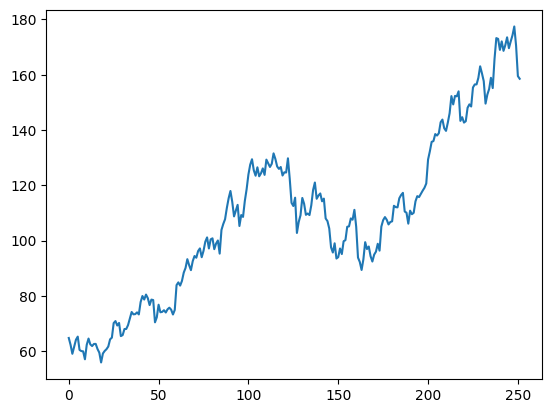

In [13]:
plt.plot(percent_change(stock_a))

In [25]:
len(stock_b.index)

581

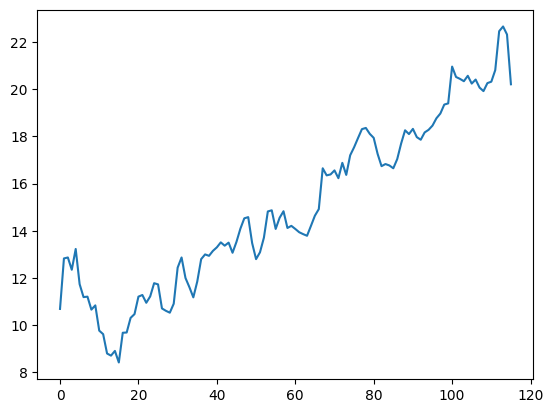

In [14]:
plt.plot(percent_change(stock_b))

In [15]:
stocks = pd.concat([stock_a, stock_b], ignore_index=True)
stocks['daily_change'] = stocks['close'] - stocks['open']
stocks.head()

,date,open,high,low,close,volume,Name,daily_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [16]:
stock_a['daily_change'] = 100*(stock_a['close'] - stock_a['open'])/stock_a['open']
stock_b['daily_change'] = 100*(stock_b['close'] - stock_b['open'])/stock_b['open']

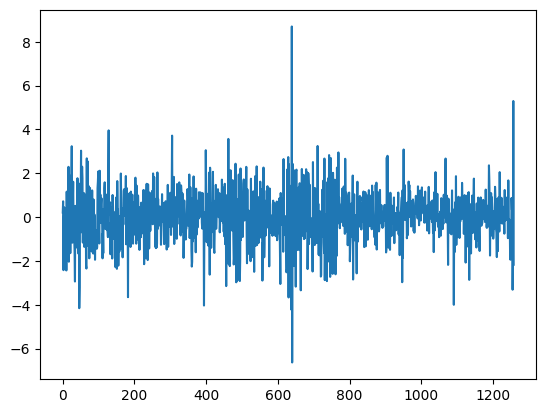

In [17]:
plt.plot(stock_a['daily_change'])

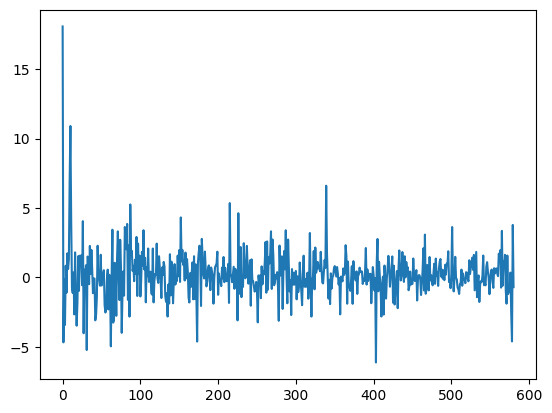

In [18]:
plt.plot(stock_b['daily_change'])

In [19]:
corr = stock_a['close'].corr(stock_b['close'])

In [20]:
corr

0.957253474734561

# Correlation here

In [21]:
def correlation(stock_a, stock_b):
    corr = stock_a['close'].corr(stock_b['close'])
    return corr

def csv_loader(filepath):
    filenames = os.listdir(filepath)
    csv_names = [filename for filename in filenames if filename.endswith('.csv')]
    csv_files = {}
    for name in csv_names:
        df = pd.read_csv(filepath+name)
        csv_files[df.Name.iloc[0]] = df
    return csv_files

In [22]:

project_directory = os.path.dirname(os.path.abspath("main.py")) 
stocks_directory = os.path.dirname(os.path.abspath(project_directory)) 
stocks_directory

'c:\\Users\\lukes\\Desktop\\Schoolwork\\COP3530\\DeFAANG'

In [23]:
files = csv_loader(stocks_directory+'/individual_stocks_5yr/')

In [24]:
adj_list = {}
for i, stock1 in enumerate(files):
    adjacent_corrs = {}
    for j, stock2 in enumerate(files):
        if i == j:
            continue
        adjacent_corrs[stock2.Name.iloc[0]] = correlation(stock1, stock2)
    adj_list[stock1.Name.iloc[0]] = adjacent_corrs
    
with open('adj_list.pkl', 'wb') as file:
    pickle.dump(adj_list, file)

TypeError: string indices must be integers, not 'str'

In [ ]:
#Adjacency list for one stock
adj_list['AAL']

In [ ]:
#correlation of one stock to another
adj_list['AAL']['AAPL']

# Standard Dev, latest value by name

In [ ]:
features = pd.DataFrame(columns = ['Name', 'StandDev', 'LastClosingVal'])
for stock in files:
    std_dev = stock.close.std()
    name = stock.Name.iloc[0]
    lastVal = stock.close.iloc[-1]
    dict = {'Name' : name,'StandDev':std_dev, 'LastClosingVal' : lastVal}
    ser = pd.Series(dict)
    new_row_df = pd.DataFrame(ser).transpose()
    features = pd.concat([features, new_row_df], ignore_index=True)

In [ ]:
features.head()

In [ ]:
features.to_csv('../clean_data/stocks_clean.csv')

### Testing Adjacency matrix class

In [ ]:
import pandas as pd
import itertools

class Graph:
    def __init__(self):
        self.adjacency_matrix = {}
        self.vertex_count = 0

    def add_vertex(self, vertex):
        if vertex not in self.adjacency_matrix:
            self.adjacency_matrix[vertex] = {}
            for v in self.adjacency_matrix:
                if v != vertex:
                    self.adjacency_matrix[v][vertex] = 0
                    self.adjacency_matrix[vertex][v] = 0
            self.vertex_count += 1
            self.adjacency_matrix[vertex] = {v: 0 for v in self.adjacency_matrix}

    def add_edge(self, from_vertex, to_vertex, weight):
        # Check for self-loop and parallel edges
        if from_vertex != to_vertex and self.adjacency_matrix[from_vertex][to_vertex] == 0:
            self.adjacency_matrix[from_vertex][to_vertex] = weight
            self.adjacency_matrix[to_vertex][from_vertex] = weight 
        else:
            print("Edge not added.")

    def get_index(self, vertex):
        return self.adjacency_matrix[vertex]

    def print_matrix(self):
        print("Adjacency Matrix:")
        for vertex, edges in sorted(self.adjacency_matrix.items()):
            print(f"{vertex}: {edges}")

    def get_weight(self, from_vertex, to_vertex):
        return self.adjacency_matrix[from_vertex][to_vertex]

def correlation(stock_a, stock_b):
    corr = stock_a['close'].corr(stock_b['close'])
    return corr

def build_graph(csv_list, graph):

    vertices = csv_list.keys()
    for vertex in vertices:
        graph.add_vertex(vertex)
    
    edges = itertools.combinations(vertices,2)
    for edge in edges:
        weight = correlation(csv_list[edge[0]], csv_list[edge[1]])
        graph.add_edge(edge[0], edge[1], weight)

    #graph.print_matrix()
    weight = graph.get_weight('A','AAPL')
    print(weight)


In [ ]:
graph = Graph()

build_graph(files, graph)